# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.



Lo primero que realicé fue la importación de librería Pandas para poder analizar los datos, seguido de la librería Matplotlib, que servirá en los siguientes pasos para poder analizar de manera visual la información que sea necesaria.

El segundo paso sería leer cada dataframe y, a su vez, nombrarlo.

En el tercer paso, utilizamos las funciones info para obtener los tipos de datos que manejamos, visualizar si hay valores ausentes y, por último, un sample de 5 para ver valores aleatorios.


In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# leer conjuntos de datos en los DataFrames
orders= pd.read_csv('/datasets/instacart_orders.csv',delimiter=';')
products= pd.read_csv('/datasets/products.csv',delimiter=';')
aisles= pd.read_csv('/datasets/aisles.csv',delimiter=';')
departments= pd.read_csv('/datasets/departments.csv',delimiter=';')
order_products= pd.read_csv('/datasets/order_products.csv',delimiter=';')

In [3]:
# mostrar información del DataFrame
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
263074,479,31038,9,2,9,16.0
266538,508304,180448,21,3,21,22.0
248538,2955260,151022,60,6,7,6.0
34514,2085554,109041,7,5,9,4.0
129299,1863115,160860,3,0,18,18.0


In [4]:
# mostrar información del DataFrame
products.info()
products.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
41475,41476,Gluten Free Honey Nut Granola Mix,121,14
31917,31918,Hawaiian Volcanic Water,115,7
13073,13074,White Cranberry Juice Drink,98,7
4458,4459,Gourmet Fat Free Marinade,5,13
41812,41813,Spanish Onion,123,4


In [5]:
# mostrar información del DataFrame
aisles.info()
aisles.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
77,78,crackers
121,122,meat counter
18,19,oils vinegars
48,49,packaged poultry
26,27,beers coolers


In [6]:
# mostrar información del DataFrame
departments.info()
departments.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
15,16,dairy eggs
16,17,household
0,1,frozen
19,20,deli
1,2,other


In [7]:
# mostrar información del DataFrame
order_products.info()
order_products.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
2146704,3226760,4366,9.0,1
577981,1958121,31589,3.0,0
1793456,2037481,22963,3.0,1
1190885,644923,7021,1.0,1
3216291,2389107,46049,9.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Despues de una exploracion breve de los 5 dataframe podemos ver que , al menos dos de ellos tienes valores ausentes y tienen bastantes mas datos que los demas estos son , orders y order_products 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- Verificar y corregir tipos de datos:

  - En el inciso anterior, se pudo verificar esto mediante info, por lo cual avanzamos a los siguientes puntos.

- Identificar y completar valores ausentes:

     - Utilizando info() o isnull().sum(), podemos identificar la cantidad y ubicación de los valores nulos para abordar                valores ausentes. Podríamos optar por eliminar las filas afectadas si las afectaciones son mínimas. Si la cantidad de            valores nulos es significativa, podríamos considerar utilizar la media o mediana para rellenar estos.
     
     
- Identificar y eliminar valores duplicados:
    - Utilizaremos duplicated() para identificar duplicados y drop_duplicates() para la eliminación de estos. También se debe         hacer un seguimiento más detallado para ciertas columnas, por ejemplo, aquellas que contienen valores de ID.




## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print('Duplicados',orders.duplicated().sum())

orders[orders.duplicated()]


Duplicados 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Son los dias miercoles a los 2 am

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_orders_2am = orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)]
display(wednesday_orders_2am)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


¿Qué sugiere este resultado?
   - Probablemente ha esa hora se hace el cierre de cada semana generando un cantidad de pedidos duplicados , pero tambien            podemos ver como son una cantidad minima de ellos dando el horario y a que tal ves se dia con menor margen de pedidos con        analisis mas detallado podriamos confirmarlo.

In [10]:
# Elimina los pedidos duplicados
orders.drop_duplicates(subset='order_id',keep='first', inplace=True)


In [11]:
# Vuelve a verificar si hay filas duplicadas
orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders.info()
print()
print(orders[orders.duplicated(subset='order_id',keep=False)])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos

Despues de la eliminacion de datos duplicados , notamos que hay ausencia de datos pero posteriormente podremos hacer un analisis sobres ellos.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Duplicados',products.duplicated().sum())
products[products.duplicated()]

Duplicados 0


,product_id,product_name,aisle_id,department_id


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos

print('IDs duplicados',len(products[products.duplicated(subset='product_id', keep=False)]))
products[products.duplicated(subset='product_id', keep=False)]['product_id'].unique()


IDs duplicados 0


array([], dtype=int64)

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_upper'] = products['product_name'].str.upper()
print('Nombres Duplicados',len(products[products.duplicated(subset='product_upper', keep=False)]))
print()
duplicated_names=products[products.duplicated(subset='product_upper', keep=False)]
print(duplicated_names['product_upper'].sort_values().unique())

Nombres Duplicados 1465

['18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP'
 'AGED BALSAMIC VINEGAR OF MODENA' 'ALBACORE SOLID WHITE TUNA IN WATER'
 'AMERICAN CHEESE SLICES' 'ANCHOVY FILLETS IN OLIVE OIL'
 'APRICOT ENERGY BAR' 'BAG OF ORANGES' 'BAG OF ORGANIC LEMONS'
 'BALSAMIC VINEGAR OF MODENA' 'BBQ SAUCE' 'BEEF CHILI WITH BEANS'
 'BEEF RAVIOLI IN TOMATO & MEAT SAUCE' 'BIOTIN 1000 MCG' 'BLANC DE NOIRS'
 'BLEU CHEESE SALAD DRESSING AND DIP' 'BURRITO- STEAK & CHEESE'
 'CANDY BAR' 'CARROT AND CELERY STICKS' 'CAULIFLOWER HEAD'
 'CHICKEN IN A BISKIT BAKED SNACK CRACKERS' 'CHICKEN WITH RICE SOUP'
 'CHILI WITH BEANS' 'CHIPOTLE PEPPERS IN ADOBO SAUCE'
 'CHOPPED GARLIC IN WATER' 'CHUNK LIGHT TUNA IN VEGETABLE OIL'
 'CHUNK LIGHT TUNA IN WATER' 'CINNAMON ROLLS WITH ICING'
 'COCONUT JUICE WITH PULP' 'CONCENTRACE TRACE MINERAL DROPS'
 "COOKIES 'N CREAM ICE CREAM" 'COSMIC BROWNIES WITH CHOCOLATE CHIP CANDY'
 'CREAM OF CELERY CONDENSED SOUP' 'CREAM OF MUSHROOM SOUP'
 'CREAM OF TARTAR' 'CRUSHED TOMATOES W

In [16]:
products.drop(columns=['product_upper'],inplace=True)

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes

products_nonull=products[products.duplicated(subset='product_name', keep=False) & products['product_name'].notnull()]
print(products_nonull)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [18]:
products['product_upper']=products['product_name'].str.upper()
duplicated_names=products[products.duplicated(subset='product_upper', keep=False)]
print(duplicated_names)

       product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  Biotin 1000 mcg        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id                   

In [19]:
products=products.drop(columns=['product_upper'])
products.loc[products['product_name']=='Unknown','product_name']='UNKNOWN'
products['product_name']=products['product_name'].str.upper()


In [20]:
products_cleaned=products.drop_duplicates(subset='product_name')
products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48333 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     48333 non-null  int64 
 1   product_name   48332 non-null  object
 2   aisle_id       48333 non-null  int64 
 3   department_id  48333 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Luego de convertir los nombres de los productos con Mayusculas y  buscar nombres duplicados encontramos 1465 registro duplicados, dentro de ellos encontramos la palabra Unknown la cual contiene una parte en mayuscula y una miniscula , para este problema lo mas sencillo fue hacer que la palabra fuera en mayusculas UNKNOWN, despues esto ya se procedio a hacer una limpieza general dando como final registros de 48333 entradas sin valores nulos.



### `departments` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

print('Duplicados',departments.duplicated().sum())

display(departments[departments.duplicated()])

departments.columns

Duplicados 0


,department_id,department


Index(['department_id', 'department'], dtype='object')

In [22]:
# Revisa únicamente si hay IDs duplicadas de productos

print('Duplicados en IDs',departments['department_id'].duplicated().sum())

Duplicados en IDs 0


In [23]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Este dataframe no tuvo problemas en general en su analisis no se encontraron valores duplicados tanto en general como en los ID's.

### `aisles` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas

print('Duplicados',aisles.duplicated().sum())

display(aisles[aisles.duplicated()])

aisles.columns

Duplicados 0


,aisle_id,aisle


Index(['aisle_id', 'aisle'], dtype='object')

In [25]:
# Revisa únicamente si hay IDs duplicadas de productos

print('Duplicados en IDs',aisles['aisle_id'].duplicated().sum())

Duplicados en IDs 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Este dataframe no tuvo problemas en general en su analisis no se encontraron valores duplicados tanto en general como en los ID's

### `order_products` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas

print('Duplicados',order_products.duplicated().sum())

display(order_products[order_products.duplicated()])

order_products.columns

Duplicados 0


,order_id,product_id,add_to_cart_order,reordered


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [27]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

duplicated_id=order_products[order_products.duplicated(subset=['order_id'],keep=False)]
print('Duplicados',len(duplicated_id))

display(duplicated_id)


Duplicados 4523160


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [28]:
order_products_clean=order_products.drop_duplicates()
order_products_clean.reset_index(drop=True,inplace=True)

display(order_products_clean.head())
order_products_clean.info()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB




Se hizo una revision general del dataframe donde no mostraba datos duplicados , pero haciendo un analisis mas profundo se encontraron 4523160  IDs duplicador de ordenes,despues de esto se realizo una limpieza de estos en base a los IDs y se reincio en el index.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products['product_name'].isnull()]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Se encontraron 1258 valores ausentes en la columna 'product_name', pero tambien se observa que  todos vienen del departamento 21 y del pasillo 100 

In [30]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [31]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products['aisle_id']==100]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
encontramos que son los mismo 1258 filas al igual que los valores ausentes en la columan 'product name'

In [32]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products['department_id']==21]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.
Encontramos que son los mismo 1258 filas al igual que los valores ausentes en la columan 'product name'

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments.columns)
print(aisles.columns)

Index(['department_id', 'department'], dtype='object')
Index(['aisle_id', 'aisle'], dtype='object')


In [34]:
print(aisles[aisles['aisle_id']==100])
print(departments[departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
Tanto para el pasillo con ID 100 como del departamento con ID 21 tienen el mismo resultado "missing". podemos deducir que los valores  ausentes en la columna 'product_name' en la tabla 'products' están asociadas a estos identificadores. 


In [35]:
# Completa los nombres de productos ausentes con 'Unknown'

products['product_name'].fillna('Unknown',inplace=True)

products[products['product_name']=='Unknown']

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se llenaron los valores vacios con la palabra Unknown , y verificamos que estos ya estuvieran llenos todos los espacios que marcaban NaN, y nos da las mismas 1258 filas que antes tenian valores ausentes. 

### `orders` data frame

In [36]:
# Encuentra los valores ausentes

orders[orders.isnull().any(axis=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [37]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders.isnull().any(axis=1))& (orders['order_number']!=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Primero checamos si hay valores ausentes se encontraron valores en la columna 'days_since_prior_order' la cual es el  número de días transcurridos desde que este cliente hizo su pedido anterior, por lo cual es logico que los usarios que hicieron su primer orden tienen un valor ausente en esa columna ,para verificar esto se checo si hay valores ausentes diferentes al primer pedido obtienen que no hay ninguno. 


### `order_products` data frame

In [38]:
# Encuentra los valores ausentes
order_products[order_products.isnull().any(axis=1)]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [39]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Orden secuencial maxima en el que se añadió cada artículo en el carrito.',order_products['add_to_cart_order'].max())
print('Orden secuencial minima en el que se añadió cada artículo en el carrito.',order_products['add_to_cart_order'].min())

Orden secuencial maxima en el que se añadió cada artículo en el carrito. 64.0
Orden secuencial minima en el que se añadió cada artículo en el carrito. 1.0


Describe brevemente cuáles son tus hallazgos.

Si hay valores ausentes en la columna 'add_to_cart_order', que es el numero total de articulos pedidos de manera secuencial , por lo que se sugiere checar los valores minimos y maximos.Se observa que el 64 es el maximo podria ser que los valores mayores a este generen este valor ausente.

In [40]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

ids_missing_add_to_cart_order=order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(ids_missing_add_to_cart_order)
print(len(ids_missing_add_to_cart_order))



[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]
70


In [41]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

group_ids = order_products[order_products['order_id'].isin(ids_missing_add_to_cart_order)].groupby('order_id')['product_id'].count()

print("'Numero minimo de pedidos de'add_to_cart_order':" ,group_ids.min()) 



'Numero minimo de pedidos de'add_to_cart_order': 65


Describe brevemente cuáles son tus hallazgos.

In [42]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'].fillna(999,inplace=True)

order_products['add_to_cart_order']=order_products['add_to_cart_order'].astype(int)


print('Checamos si hay valores ausentes:\n',order_products.isnull().sum())

order_products.info()

Checamos si hay valores ausentes:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Despues un analisis vemos que efectivamente los pedidos con mas de 64 generan los valores ausentes , por lo cual rellenamos con el valor de 999  indicando que llegaron al maximo de pedidos del producto y tambien cambiamos el valor a entero dado que era flotante.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

Se llevaron a cabo diversas acciones para mejorar la calidad y coherencia de los conjuntos de datos en los DataFrames orders, products y order_products.

Eliminación de duplicados: Se identificaron y eliminaron las entradas duplicadas en los DataFrames mencionados para asegurar que cada registro sea único.

Manejo de valores faltantes:

En el DataFrame products, se completaron los nombres de productos faltantes en las columnas 'pasillo' y 'departamento' con "Unknown" para evitar inconsistencias.
En order_products, se asignó el valor 999 a las entradas faltantes en la columna 'add_to_cart_order' y se convirtieron al tipo entero, proporcionando un valor predefinido con significado.
Además, se abordaron los casos de duplicados engañosos en los nombres de productos en products, normalizándolos mediante la conversión a mayúsculas y eliminando las filas duplicadas resultantes.




# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [43]:
print("Valores en 'order_hour_of_day':",sorted(orders['order_hour_of_day'].unique()))

Valores en 'order_hour_of_day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [44]:
print("Valores en 'order_dow':",sorted(orders['order_dow'].unique()))

Valores en 'order_dow': [0, 1, 2, 3, 4, 5, 6]


Escribe aquí tus conclusiones 

Encontramos que efectivamente los valores de 'order_hour_of_day' y  'order_dow' oscilan dentro de los valores razonables para el analisis.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

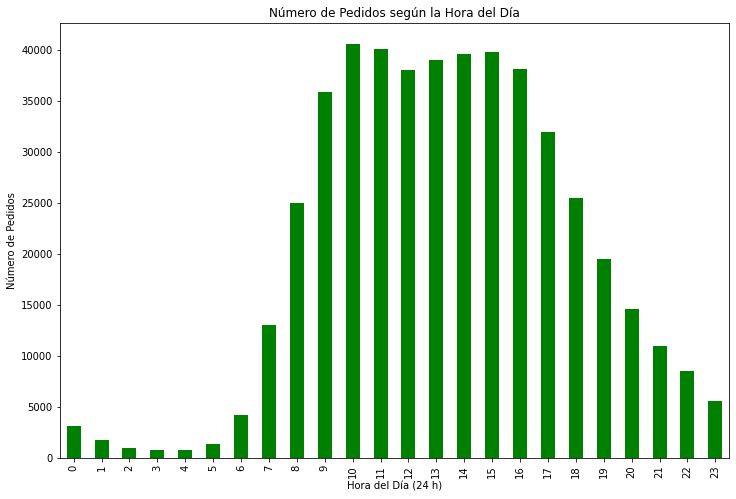

In [45]:
orders['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    title='Número de Pedidos según la Hora del Día',
    xlabel='Hora del Día (24 h)',
    ylabel='Número de Pedidos',
    legend=False,
    figsize=[12, 8],
    color='green'
)

plt.show()


Escribe aquí tus conclusiones

En este gráfico observamos la variacion de número de pedidos  a lo largo del día.Se observa que la hora  pico es alrededor de las 10 de la mañana, luego hay una disminución gradual hasta la medianoche. 

### [A3] ¿Qué día de la semana compran víveres las personas?

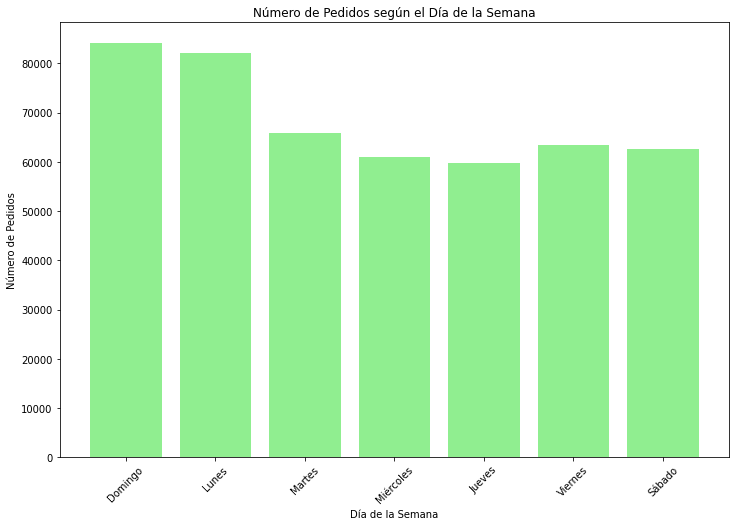

In [46]:

day_number = {0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado'}

order_day = orders['order_dow'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=[12, 8])
plt.bar(order_day.index, order_day, color='lightgreen')
plt.title('Número de Pedidos según el Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(range(7), [day_number[i] for i in range(7)], rotation=45)
plt.show()


Escribe aquí tus conclusiones

El gráfico muestra los pedidos a lo largo de la semana. Observamos que el día más ocupado es el domingo, mientras que el jueves es el día con menos actividad, esto podria relacionarse con las actividades de las personas a lo largo de la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

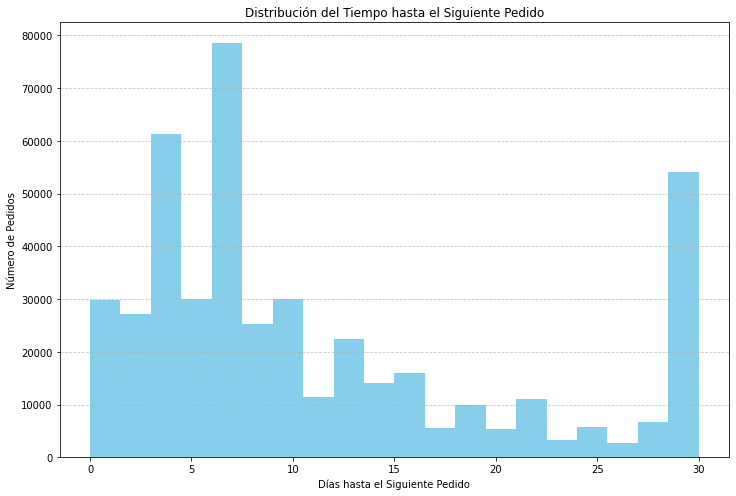

In [47]:

plt.figure(figsize=[12, 8])
plt.hist(orders['days_since_prior_order'], bins=20, color='skyblue')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribución del Tiempo hasta el Siguiente Pedido')
plt.xlabel('Días hasta el Siguiente Pedido')
plt.ylabel('Número de Pedidos')

plt.show()


Escribe aquí tus conclusiones

Este histograma revela la distribución del tiempo que los usuarios esperan antes de realizar un nuevo pedido. Se puede observar que muchos usuarios tienden a realizar pedidos con frecuencia, ya que hay un pico en el intervalo de 0 a 7 días. Además, hay un segundo grupo de usuarios que esperan alrededor de 30 días entre pedidos. Este análisis puede ser crucial para comprender los patrones de compra y la lealtad del cliente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

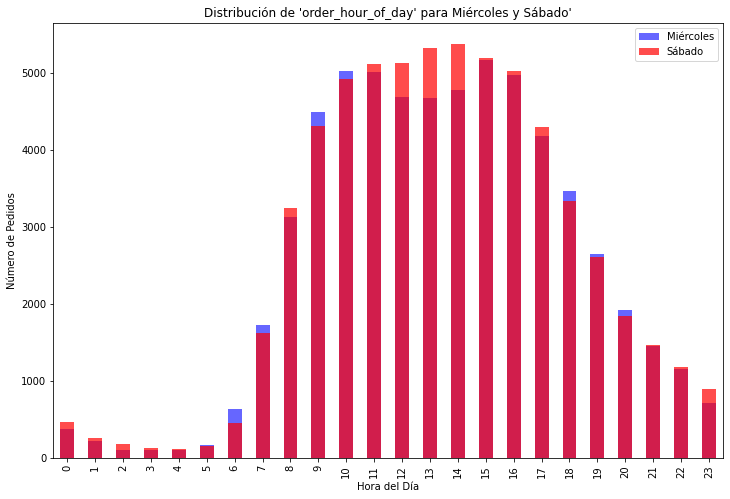

In [51]:

wednesday = orders[orders['order_dow'] == 3] 
saturday = orders[orders['order_dow'] == 6] 
plt.figure(figsize=[12, 8])

wednesday['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    color='blue',
    alpha=0.6,
    label='Miércoles'
)
saturday['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    alpha=0.7,
    label='Sábado'
)
plt.title("Distribución de 'order_hour_of_day' para Miércoles y Sábado'")
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.show()


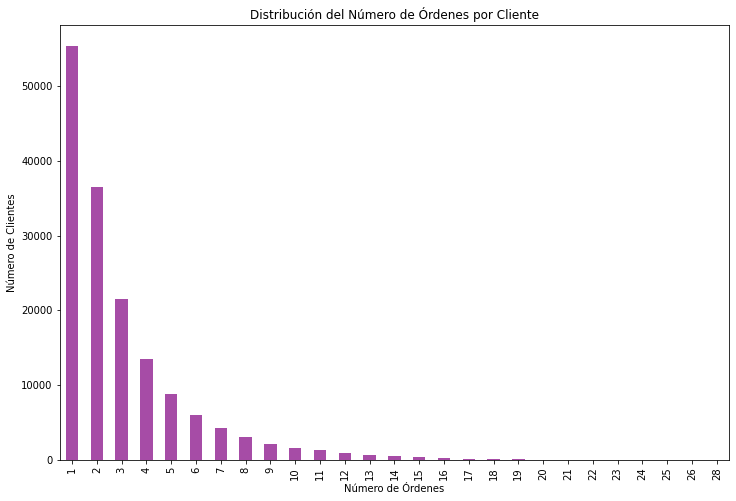

In [54]:
# Número de órdenes por usuario
orders_user = orders.groupby('user_id')['order_number'].count()

# Gráfica de barras para la distribución
plt.figure(figsize=[12, 8])
orders_user.value_counts().sort_index().plot(
    kind='bar',
    color='purple',
    alpha=0.7
)

# Configuración de títulos y etiquetas de ejes
plt.title('Distribución del Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes')
plt.ylabel('Número de Clientes')

plt.show()


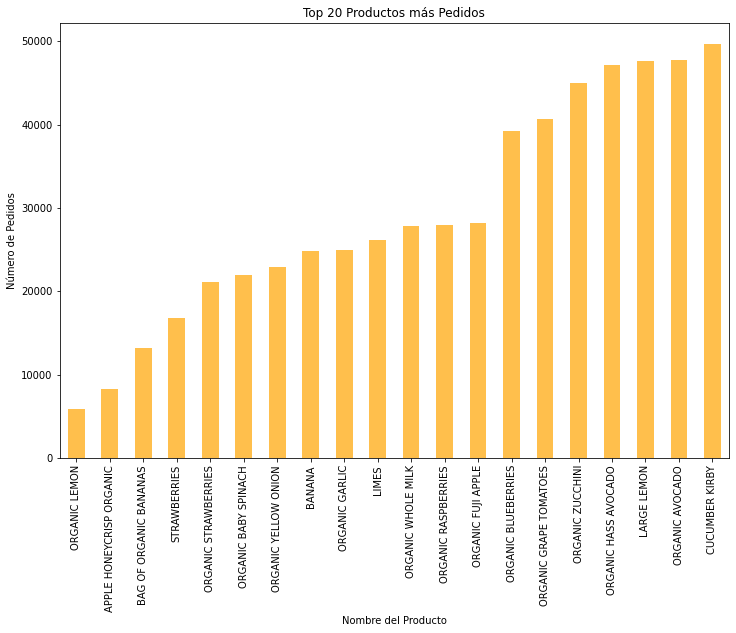

In [59]:
top_products = order_products['product_id'].value_counts().head(20)
top_products_names = products[products['product_id'].isin(top_products.index)][['product_id', 'product_name']]

top_products_names.plot(
    x='product_name',
    y='product_id',
    kind='bar',
    title='Top 20 Productos más Pedidos',
    xlabel='Nombre del Producto',
    ylabel='Número de Pedidos',
    legend=False,
    figsize=[12, 8],
    color='orange',
    alpha=0.7
)
plt.show()




Escribe aquí tus conclusiones

Gráfico Distribución de 'order_hour_of_day' para Miércoles y Sábados:

    Ambas distribuciones muestran picos en ciertas horas del día.
    Pueden diferir en términos de magnitud y ubicación, lo que sugiere variaciones en los hábitos de compra entre miércoles y       sábados.
    Aunque las distribuciones se superponen, pueden haber diferencias sutiles en la frecuencia de pedidos durante ciertas horas.
    
    
Gráfico de los 20 Principales Productos Pedidos con Más Frecuencia:

    Presenta los 20 productos más frecuentemente pedidos junto con su identificación y nombre.
    Estos productos son populares entre los clientes y pueden ser objetivos clave para estrategias de marketing o gestión de         inventario.
    Analizar estos productos proporciona ideas sobre preferencias y tendencias de compra de los clientes.
    
Gráfico de Distribución del Número de Órdenes por Cliente:

    Revela que la mayoría de los clientes realizan un número limitado de órdenes, sugiriendo un predominio de compradores           ocasionales.
    Existe un segmento reducido de clientes que realizan un número significativamente mayor de órdenes, indicando una posible       base de clientes leales o frecuentes.
    Proporciona una visión clara de la variabilidad en los hábitos de compra de los usuarios, crucial para la formulación de         estrategias comerciales y de retención de clientes.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

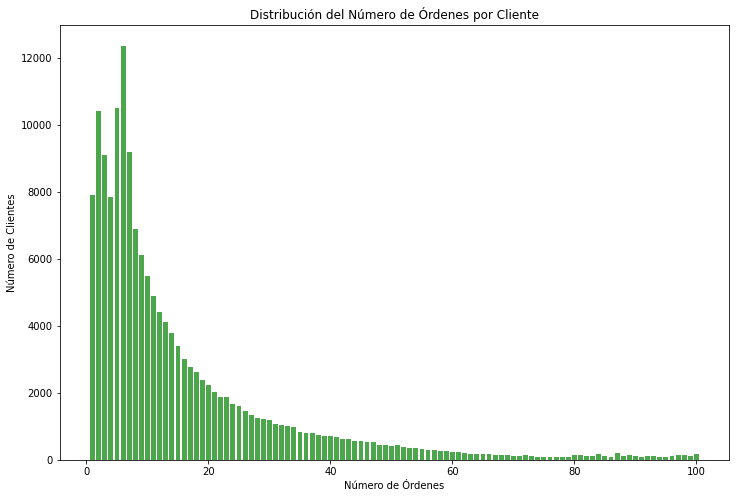

In [64]:
orders_user = orders.groupby('user_id')['order_number'].max()

plt.figure(figsize=[12, 8])
plt.bar(orders_user.value_counts().index, orders_user.value_counts().sort_index(), color='green', alpha=0.7)

plt.title('Distribución del Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes')
plt.ylabel('Número de Clientes')

plt.show()


Escribe aquí tus conclusiones

La grafica muestra que la  mayoría de los clientes están en la categoría de 1 a 10 órdenes.Aunque son menos frecuentes, aún hay clientes que realizan pedidos mayores a 20 órdenes estos clientes podrían ser considerados como clientes frecuentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [70]:

top_products = order_products['product_id'].value_counts().head(20)
top_product_ids = top_products.index
top_products_Name_id = pd.merge(
    order_products[order_products['product_id'].isin(top_product_ids)],
    products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

top_products_Name_id = top_products_info.groupby(['product_id', 'product_name']).size().reset_index(name='frequency')
top_products_Name_id = top_products_info.sort_values(by='frequency', ascending=False)
top_products_Name_id

,product_id,product_name,frequency
7,24852,BANANA,66050
2,13176,BAG OF ORGANIC BANANAS,53297
4,21137,ORGANIC STRAWBERRIES,37039
5,21903,ORGANIC BABY SPINACH,33971
16,47209,ORGANIC HASS AVOCADO,29773
18,47766,ORGANIC AVOCADO,24689
17,47626,LARGE LEMON,21495
3,16797,STRAWBERRIES,20018
9,26209,LIMES,19690
10,27845,ORGANIC WHOLE MILK,19600


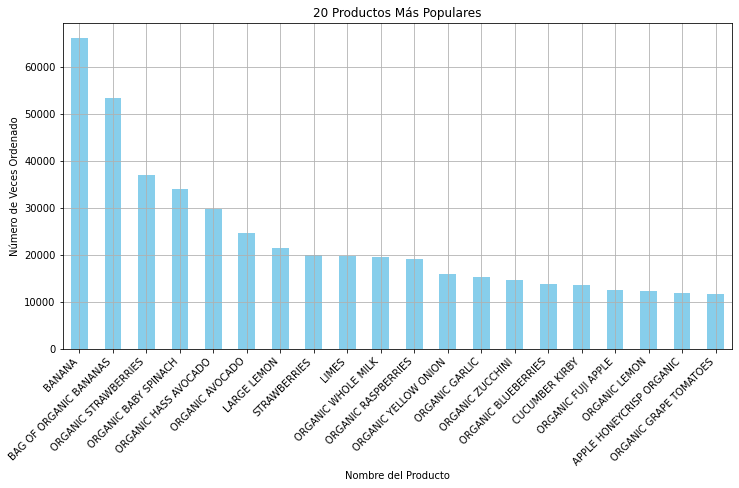

In [71]:
top_products_Name_id.plot(
    x='product_name',
    y='frequency',
    kind='bar',
    title='20 Productos Más Populares',
    xlabel='Nombre del Producto',
    ylabel='Número de Veces Ordenado',
    legend=False,
    grid=True,
    figsize=[12, 6],
    color='skyblue'
)
plt.xticks(rotation=45, ha='right')

plt.show()

Escribe aquí tus conclusiones

Al indentificar los 20 productos mas vendidos de forma grafica encontramos las bananas son el producto mas vendido y que tambien la mayoria de estos estan relacionados con productos organicos , esto podria ayudar para la disponibilidad y promociónes de productos en la tienda.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

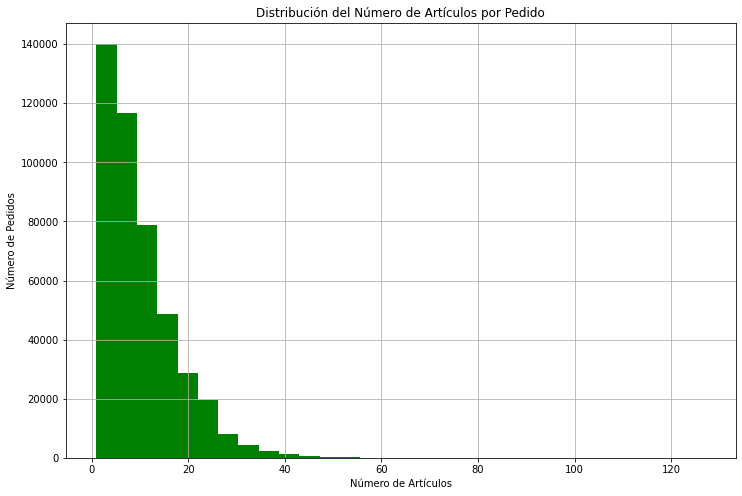

In [77]:
items_order = order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=[12, 8])
plt.hist(items_order, bins=30, color='green')
plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos')
plt.ylabel('Número de Pedidos')
plt.grid(True)

plt.show()


Escribe aquí tus conclusiones

En el grafico se observa que la distribucionde articulos por pedido , la mayoria contiene un numero bajo de productos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [92]:

top_reordered_products = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)
display(products[products['product_id'].isin(top_reordered_products.index)][['product_id', 'product_name']])



,product_id,product_name
5875,5876,ORGANIC LEMON
8276,8277,APPLE HONEYCRISP ORGANIC
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA
24963,24964,ORGANIC GARLIC
26208,26209,LIMES


Escribe aquí tus conclusiones

Se identificaron los 20 productos que se vuelven a pedir con mayor frecuencia junto con su ID y nombre , de nueva cuenta encontramos que son productos organicos que tambien se encuentran dentro del top 20 de mas vendidos , y esto podria atribuirse a que son alimentos constantemente se consumen por lo cual reordenar parece logico.


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [89]:
print(order_products.groupby('product_id')['reordered'].mean())



product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


Escribe aquí tus conclusiones

Para obtener esto tenemos que la proporcion de los  productos cuya tasa  es cercanas a 1.0 son bastante mas repetidos por los clientes,por otro lado, productos con tasas más cercanas a 0.0 son menos populares o comprados de manera más esporádica.
Por lo cual agrupamos por el 'product_id' y analizamos por la media de la columna de reordenados.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [90]:

merged = pd.merge(orders, order_products, on='order_id')
print( merged.groupby('user_id')['reordered'].mean())




user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escribe aquí tus conclusiones

Al igual que en el inciso anterior obtenemos proporciones dentro en 0 y 1 , pero con diferencia de que estas evaluan a los usuarios ,teniendo que el 1 son clientes mas leales a la empresa y con 0 aquellos que tuvieron una compra esporadica ,estos resultados podrian servir en gran medida para promociones para los clientes que mas compran o para estrategias de marketing en un futuro.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [93]:

top_first_cart_products = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)
display(products[products['product_id'].isin(top_first_cart_products.index)][['product_id', 'product_name']])


,product_id,product_name
195,196,SODA
5784,5785,ORGANIC REDUCED FAT 2% MILK
12340,12341,HASS AVOCADOS
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
19659,19660,SPRING WATER
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA


Escribe aquí tus conclusiones

De nueva cuenta encontramos alimento dentro de este top de productos que se ponen en primer lugar , son productos perecederos pero mas alla de eso esta informacion es valiosa para estrategias de marketing y disposición de productos en la plataforma en línea,  estos productos se podrian poner al principio de la lista de búsqueda o hacer promociones de ellos.

### Conclusion general del proyecto:


Fue un proyecto mas completo con sus 3 etapas descripcion de los datos , procesamiento de los datos y un analisis de ellos.

Descripción de los datos: Proporcionó una visión general de la cantidad de datos en cada DataFrame y una rápida revisión de su contenido.

Procesamiento de los datos: Se abordaron valores ausentes y duplicados, tomando decisiones basadas en su relevancia para el análisis y la calidad de los resultados.

Análisis de los datos: Se realizó un análisis detallado mediante gráficos y consultas de datos, destacando la importancia de las representaciones visuales para comprender patrones y tendencias.

Importancia del análisis de datos: Se enfatizó la importancia de comprender los hábitos de compra de los clientes para tomar decisiones inteligentes en marketing y gestión de inventario, además de mejorar la experiencia del usuario en la plataforma de compras en línea.
